# Field data processing and inversion
This notebook will feature the different processing and filtering functions of the EMagPy Python API. The example is directly taken from [here](https://gitlab.com/hkex/emagpy/-/tree/master/jupyter-notebook?ref_type=heads)

**Author:** Alberto Carrera

In [20]:
# import modules
from emagpy import Problem
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (5.5,3.5)

## Dataset 1
The data were collected using a CMD Mini-Explorer on plots sown with different cover crops in 2018 at Nottingham Sutton Bonington Campus (UK). The field in which the experiment took place had a slope and the first plot was situated at the bottom of the slope where higher clay content (higher EC) has been observed. Subsequent measurement where taken going up the slope to more sandy areas (lower EC).

### 1. Import data

First we can to specify the directory of the data, then the data can be imported using `createSurvey()` and displayed using `show()`.

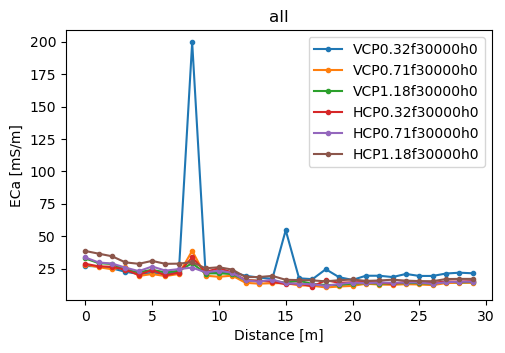

In [11]:
datadir = '../data/'

k = Problem()
k.createSurvey(datadir + 'coverCropTransect.csv')
k.show(coil='all')

### 2. Data filtering

It is evident that there are some outliers within the data. We can remove such data by applying a maximum/minimum filter:

`k.filterRange(0, 40)` #where minimum and maximum ECa values need to be specified.

Following from this we can also do a running average of the data:

`k.rollingMean(n)` # running average over every n measurements

Filter the Cover Crop dataset and plot the results to see what has happened.

The data of individual coils can be plotted by specifying the coil name in `k.show()`: `k.show(coil='VCP0.32)`

2/30 data removed (filterRange).
dataset shrunk of 3 measurements


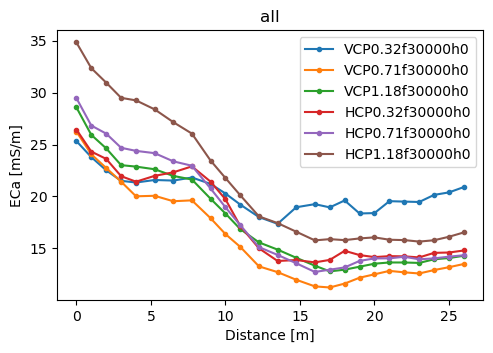

In [12]:
k.filterRange(0, 40) # supply min and max bounds for ECa values for filtering
k.rollingMean(4) # running average over every 3 measurements
k.show(coil='all') # show data, specify coil to plot and y limits

### 3. Inversion

As a first attempt we will perform a smooth inversion to look at the general distribution of EC with depths.

For this we must specify an array of depths to be fixed in the initial model:

`k.setInit(depths0=np.array([0.25, 0.5, 0.75, 1, 1.5, 2]))` # depth bottom of layer in meters

We also need to introduce smoothing into the model using an alpha value:

`k.invert(method='L-BFGS-B', alpha=0.07, regularization='l1')`

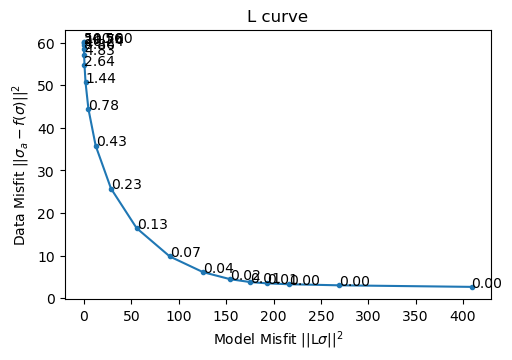

In [13]:
k.lcurve()

In [17]:
depths0 = np.arange(0.2, 2.2, 0.2)   # es: [0.2, 0.4, ..., 2.0]
conds0 = [20] * (len(depths0) + 1)   # n strati = len(depths0)+1

k.setInit(
    depths0=depths0,
    fixedDepths=[True] * len(depths0),
    conds0=conds0,
    fixedConds=[False] * len(conds0)
)

k.invert(method='L-BFGS-B',forwardModel='CS', alpha=0.15, regularization='l1')

25/25 inverted

The inverted model can be displayed using `k.showResults()` and the quality of the inversion can be assessed using `k.showMisfit()` and `k.showOne2one()`.

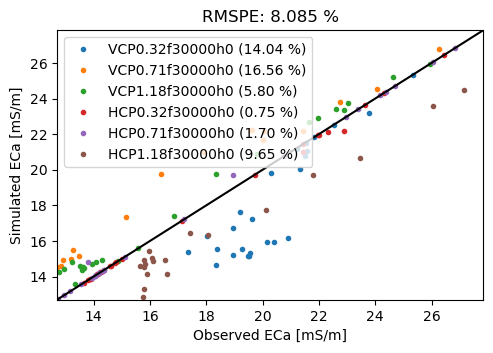

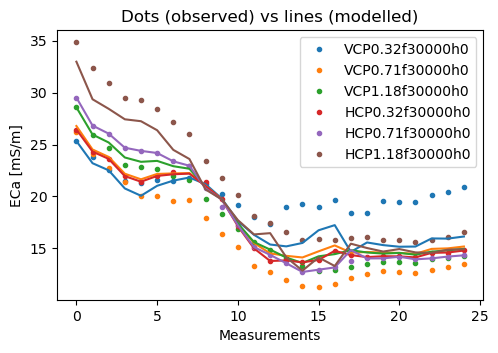

In [18]:
k.showOne2one() # modelled ECa vs observed ECa
k.showMisfit() # modelled ECa and observed ECa plotted on same axis

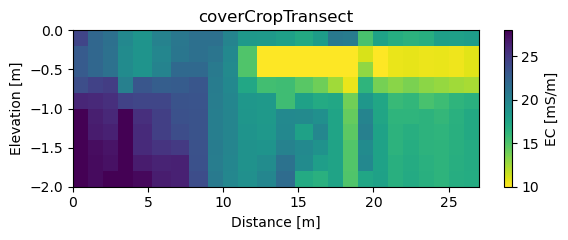

In [19]:
####### plot #######
figdir = '../figures/'
fig, ax = plt.subplots(figsize=(6, 2.5))

k.showResults(ax=ax, #cmap='viridis',
              #contour=True, 
              #rmse=True,
              vmin=10, vmax=28
              )

ax.set_ylim(-2)
fig.tight_layout()

## Dataset 2